In [21]:
import sys, os, git
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [22]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path)
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries, prepare_figure
path_figures = "/examples/"

In [23]:
def random_linear_generator(xmin=0, xmax=10, slope=0.3, alpha=0.1, pref = 1, N = 50):
    x = np.linspace(xmin, xmax, N)
    y = slope*x + pref * (np.random.random(len(x))-0.5)*x**alpha
    return x, y

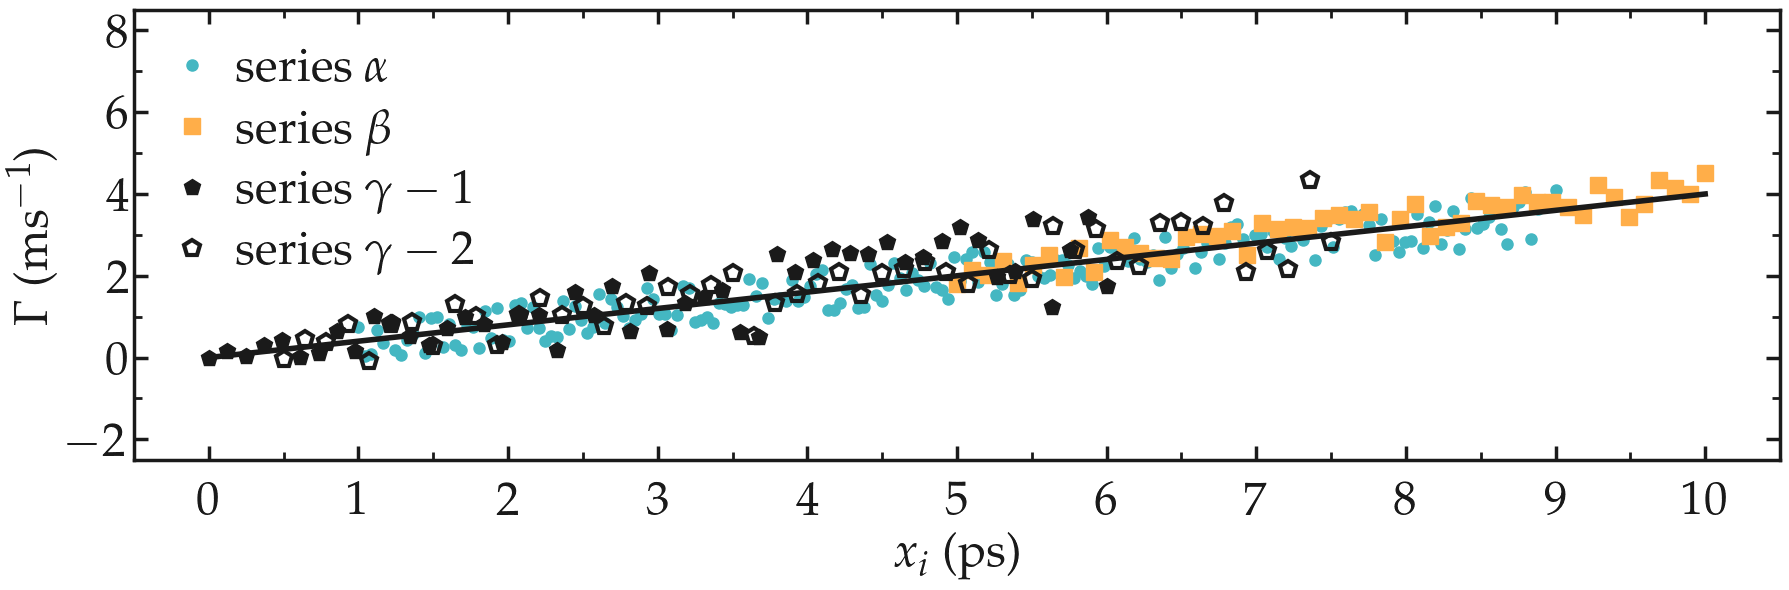

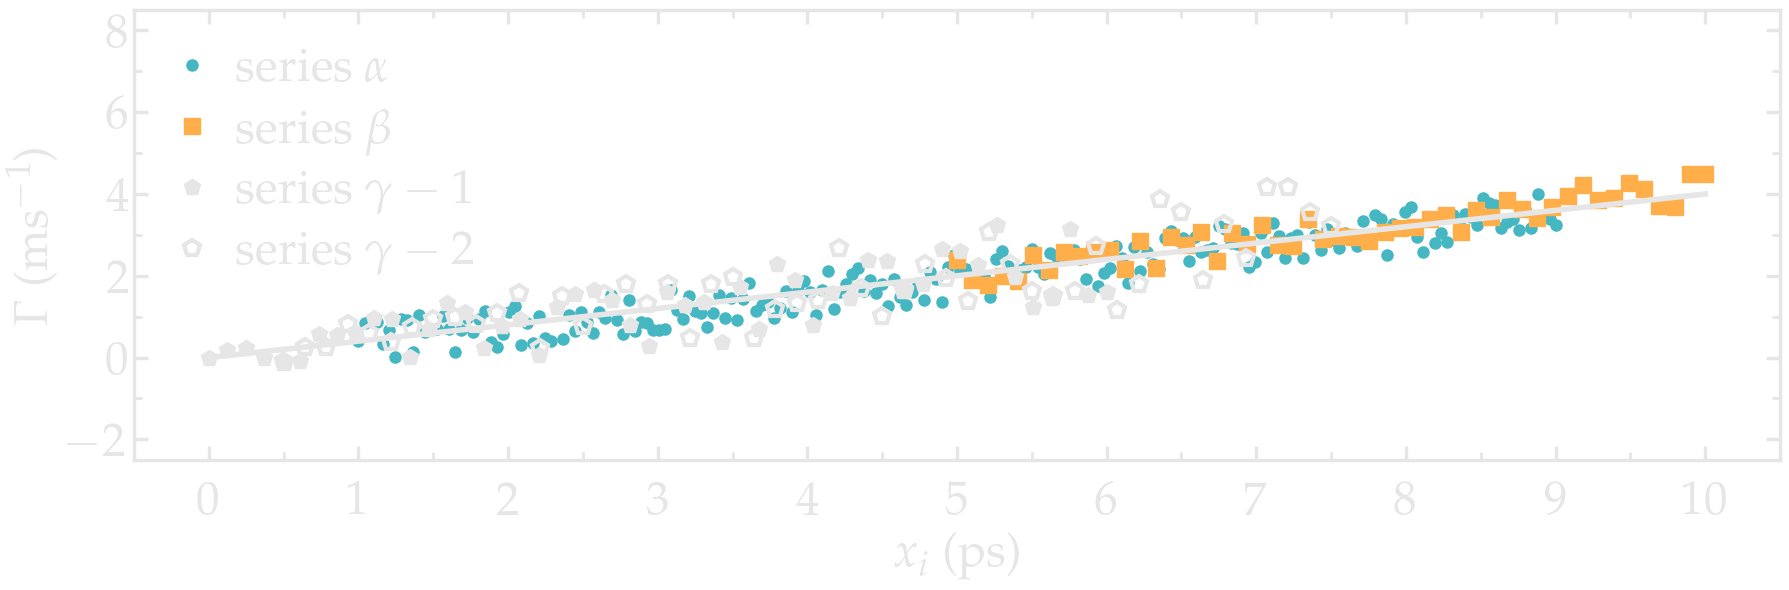

In [45]:
filename = "example-1"
desired_transparency = True
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency=desired_transparency, desired_figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x, y = random_linear_generator(xmin = 1, xmax = 9, slope = 0.39, alpha = 0.1, N = 200)
    ax[-1].plot(x, y, 'o', color=colors["mycyan"],
                markersize = 8, linewidth=4, label=r'series $\alpha$')
    x, y = random_linear_generator(xmin = 5, xmax = 10, slope = 0.41, alpha = 0.2, pref = 0.6)
    ax[-1].plot(x, y, 's', color=colors["myorange"],
                markersize = 12, linewidth=4, label=r'series $\beta$')
    x, y = random_linear_generator(xmin = 0, xmax = 6, slope = 0.4, alpha = 0.5, pref = 1.1)
    ax[-1].plot(x, y, 'p', color=mygray,
                markersize = 12, linewidth=4, label=r'series $\gamma-1$')
    x, y = random_linear_generator(xmin = 0.5, xmax = 7.5, slope = 0.4, alpha = 0.5, pref = 1.1)
    ax[-1].plot(x, y, 'p', markersize = 12, linewidth=4, label=r'series $\gamma-2$',
                markeredgewidth=3, markeredgecolor=mygray, markerfacecolor='none')
    x, y = random_linear_generator(xmin = 0, xmax = 10, slope = 0.4, pref = 0)
    ax[-1].plot(x, y, '-', color=mygray,
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$x_i$ (ps)', r'$\Gamma$ (ms$^{-1}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(-0.5, 10.5), y_boundaries=(-2.5, 8.5),
                   x_ticks=np.arange(0, 11, 1), y_ticks=np.arange(-2, 10, 2)) 
    save_figure(plt, fig, mode, git_path, path_figures, filename, transparency = desired_transparency)

In [25]:
def generate_gaussian(mu, sigma, N):
    return np.random.normal(mu, sigma, N)

In [41]:
data1 = generate_gaussian(3, 0.7, 2000)
data2 = generate_gaussian(5, 0.5, 800)
data3 = generate_gaussian(48, 0.3, 5000)
data4 = generate_gaussian(53, 1.6, 5250)

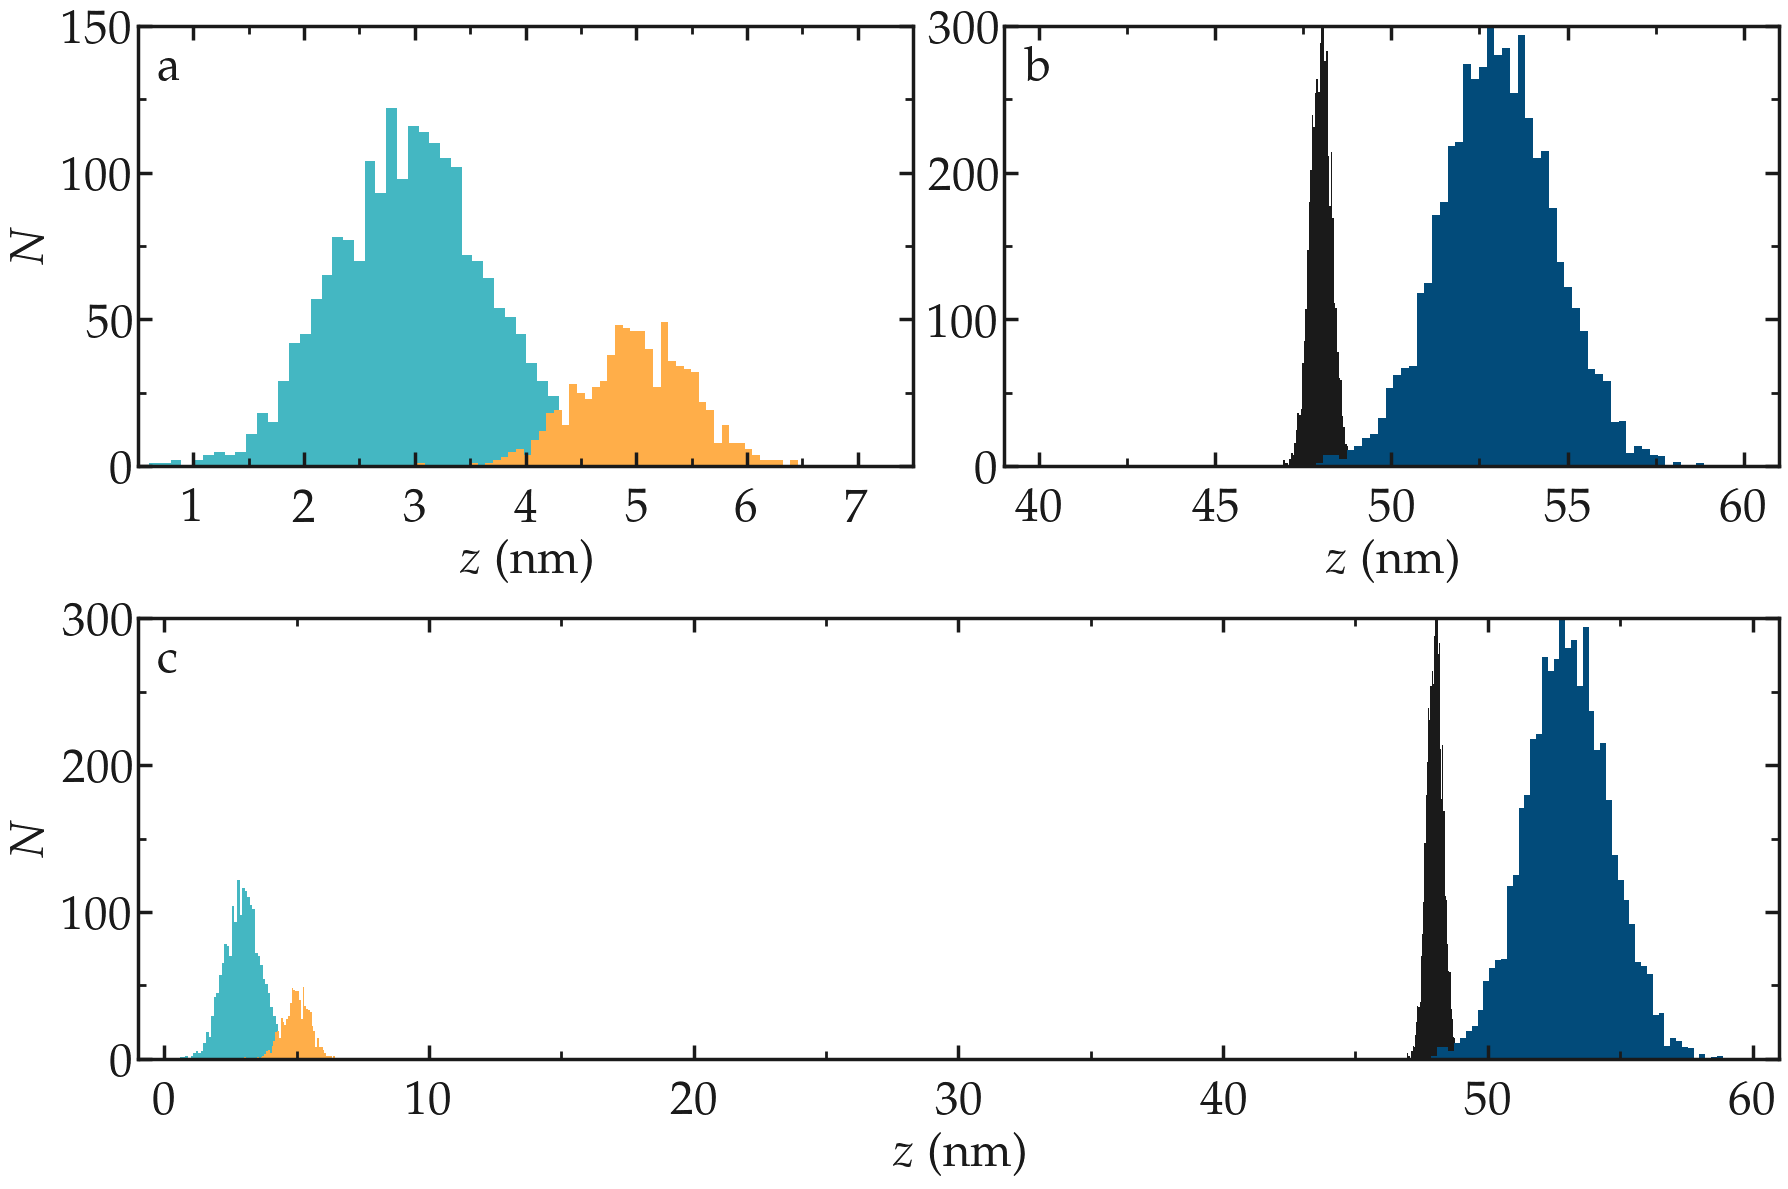

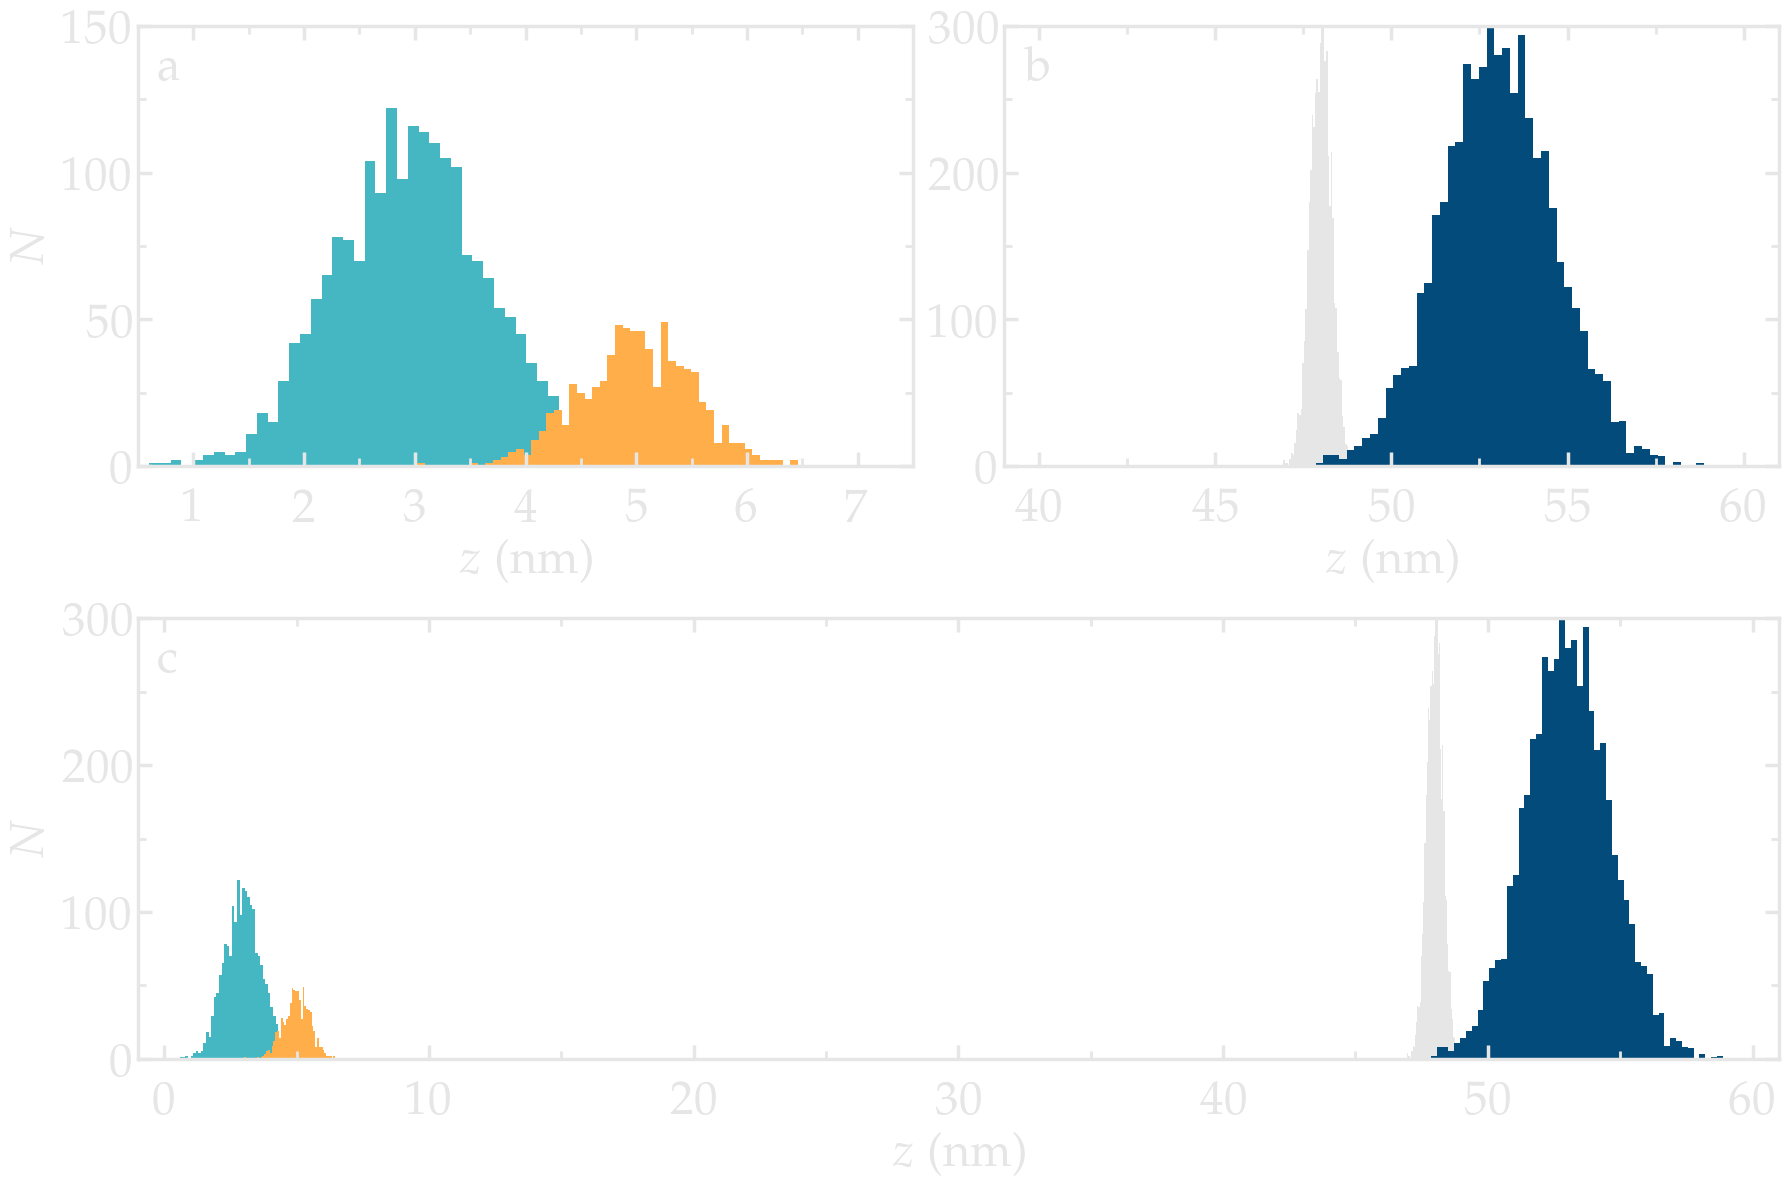

In [42]:
filename = "example-2"
desired_transparency = True
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    

    gs = gridspec.GridSpec(2, 2)

    fig = prepare_figure(mode, transparency=desired_transparency, desired_figsize=(18,12))

    ax = []
    ax.append(plt.subplot(gs[0, 0]))
    x, y = random_linear_generator(slope = 0.3, alpha = 0.1)
    ax[-1].hist(data1, bins = 50, color=colors["mycyan"])
    ax[-1].hist(data2, bins = 50, color=colors["myorange"])
    complete_panel(ax[-1], r'$z$ (nm)', r'$N$', legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.5, 7.5), y_boundaries=(0, 150),
                   x_ticks=np.arange(1, 7.1, 1), y_ticks=np.arange(0, 151, 50)) 

    ax.append(plt.subplot(gs[0, 1]))
    x, y = random_linear_generator(slope = 0.3, alpha = 0.1)
    ax[-1].hist(data3, bins = 50, color=mygray)
    ax[-1].hist(data4, bins = 50,color=colors["mydarkblue"])
    complete_panel(ax[-1], r'$z$ (nm)', r'', legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(39, 61), y_boundaries=(0, 300),
                   x_ticks=np.arange(40, 61, 5), y_ticks=np.arange(0, 301, 100)) 
    
    ax.append(plt.subplot(gs[1, :]))
    x, y = random_linear_generator(slope = 0.3, alpha = 0.1)
    ax[-1].hist(data1, bins = 50, color=colors["mycyan"],)
    ax[-1].hist(data2, bins = 50, color=colors["myorange"])
    ax[-1].hist(data3, bins = 50, color=mygray)
    ax[-1].hist(data4, bins = 50, color=colors["mydarkblue"])
    complete_panel(ax[-1], r'$z$ (nm)', r'$N$', legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(-1, 61), y_boundaries=(0, 300),
                   x_ticks=np.arange(0, 61, 10), y_ticks=np.arange(0, 301, 100)) 
    
    add_subplotlabels(fig, ax, ["a", "b", "c"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename, transparency = desired_transparency)